In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [4]:

#Set up database interaction object
data = new_client.target
#Search info for all targets named acetylcholinesterase
data_query = data.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(data_query)
#We examined the data and find the id of the target protein in ChEMBL, here is CHEMBL220

#Set up new interaction object and search for all activity entries targeting the protein, filter for data containing IC50 value
data_new = new_client.activity
data1 = data_new.filter(target_chembl_id='CHEMBL220').filter(standard_type="IC50")

#Save data to csv
data_activity = pd.DataFrame.from_dict(data1)
data_activity.to_csv("CHEMBI_acetylcholinesterase.csv")


In [7]:
data_activity = pd.read_csv("CHEMBI_acetylcholinesterase.csv")

#Filter for all entries that have complete data for chemical structure and IC50
data_activity = data_activity[data_activity.standard_value.notna()]
data_activity = data_activity[data_activity.canonical_smiles.notna()]
#Remove all duplicated entries that have same chemical structure
no_duplicate = data_activity.drop_duplicates(['canonical_smiles'])
#Exratct only columns useful for our analysis
target_columns = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
data_processed = no_duplicate[target_columns]
data_processed.to_csv("CHEMBI_filtered.csv")

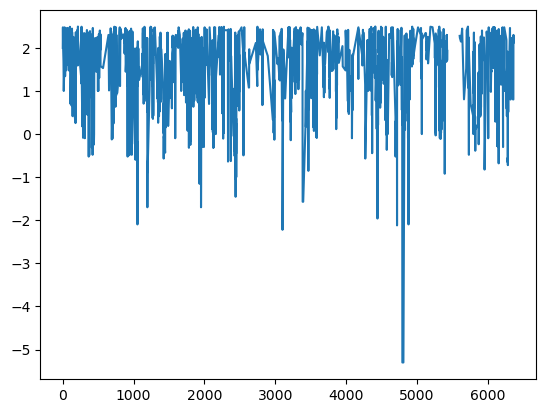

In [3]:
import numpy as np
#Plot the pIC50 to look for proper threshohold of filtering for bioactive molecules
data_active = pd.read_csv("CHEMBI_filtered.csv")
data_active["pIC50"] = data_active["standard_value"].apply(np.log10)
data_active = data_active[data_active["pIC50"]<2.5]
data_active["pIC50"].plot()
data_active.to_csv("CHEMBI_active.csv")


